In [12]:
install.packages("MASS")
library("MASS")
install.packages("missMDA")
library("missMDA")
install.packages("tidyverse")
library("tidyverse")
install.packages("caret")
library("caret")

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'MASS' is in use and will not be installed"
Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)




  There is a binary version available but the source version is later:
        binary source needs_compilation
missMDA   1.16   1.17             FALSE



installing the source package 'missMDA'


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'tidyverse' is in use and will not be installed"
Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'caret' is in use and will not be installed"


In [17]:
ionomics <- read.csv('geneva_x_transformed.csv',colClasses =c("NULL","NULL",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA,NA))
ionomics = ionomics[0:200,]
ionomics <- imputePCA(ionomics, method = "Regularized")

In [18]:
# Split the data into training (80%) and test set (20%)
set.seed(123)
training.samples <- ionomics$completeObs[,2] %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data <- ionomics$completeObs[training.samples, ]
test.data <- ionomics$completeObs[-training.samples, ]
train.data <- unlist(test.data)
test.data <- unlist(test.data)
train.data <- as.data.frame(train.data)
test.data <- as.data.frame(test.data)

In [19]:
# Fit the model
model <- lda(spec_as_int~., data = train.data)
# Make predictions
predictions <- model %>% predict(test.data)
# Model accuracy
mean(predictions$class==test.data$spec_as_int)
model

[1] 1

Call:
lda(spec_as_int ~ ., data = train.data)

Prior probabilities of groups:
    1     2     3     4     5     6     7     8 
0.075 0.050 0.125 0.150 0.050 0.375 0.150 0.025 

Group means:
          B11       Na23        Mg26        Al27         P31        S34
1 -1.01532446 -0.8248655 -0.79286562  1.77326675 -0.39035297 -0.4909196
2 -0.27156769  0.2014625 -0.09056484 -0.02176138 -0.46507458  0.2620008
3  0.10601713  0.1820648  0.21526160  0.24281080  0.78133306  0.6523296
4 -0.12539757 -0.2364267  0.21007435  0.31627809 -0.32538476 -0.3568166
5  0.84642124  0.7959370  0.85153903 -0.16186418  0.99796110 -0.4245106
6  0.21982374 -0.1799544  0.02146986  0.09351203 -0.09466268  0.6071236
7 -0.01792837 -0.3490826  0.04866879 -0.04485327  0.33993590  0.3198155
8 -0.91925085  0.3002996 -1.34007440  0.40889022 -1.34041450 -1.1394446
         K39       Ca44        Fe54       Mn55        Co59        Ni60
1 -0.3407173 -0.8411995  0.54406930 -0.3398860 -0.29710649 -0.42833306
2 -0.5577046  0.0231

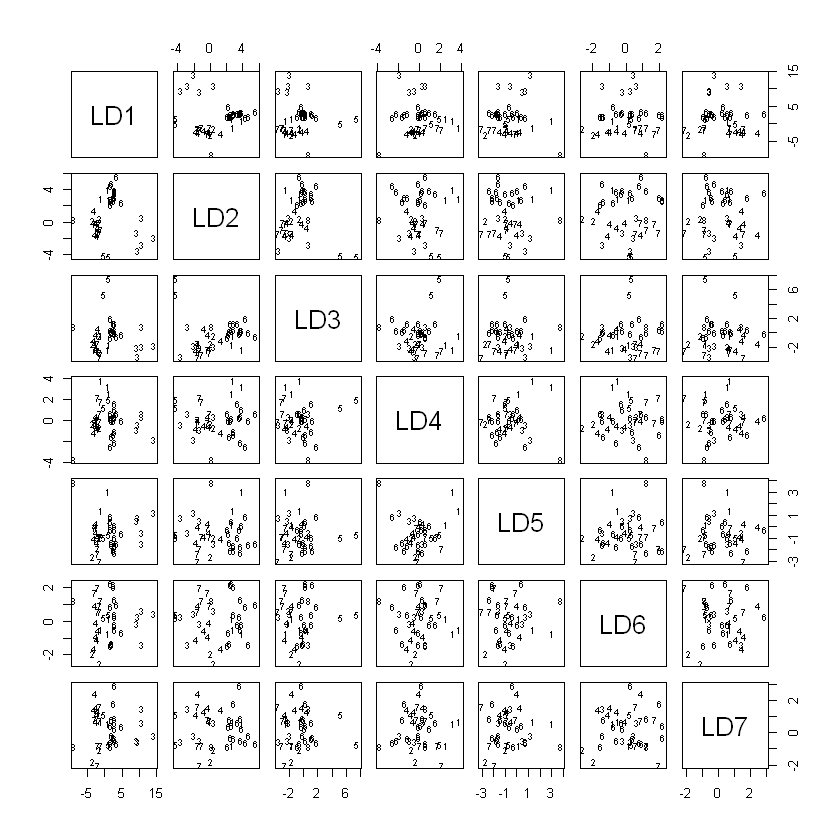

In [20]:
plot(model)

In [21]:
# Predicted classes
head(predictions$class, 6)
# Predicted probabilities of class memebership.
head(predictions$posterior, 6) 
# Linear discriminants
head(predictions$x, 3) 

[1] 1 1 1 2 2 3
Levels: 1 2 3 4 5 6 7 8

,1,2,3,4,5,6,7,8
2,9.999996e-01,1.049138e-09,1.400268e-40,2.032643e-07,5.801563e-24,1.406599e-07,1.938246e-08,4.744168e-30
4,9.883755e-01,2.295295e-08,6.328164e-26,3.599232e-08,4.298512e-25,1.162130e-02,3.189321e-06,2.835859e-37
5,9.999999e-01,6.269912e-15,2.761727e-33,1.704492e-12,1.981547e-35,6.787588e-08,8.354967e-13,2.708270e-38
15,9.795115e-13,9.981804e-01,9.455916e-48,1.308508e-03,5.858394e-25,5.076267e-13,5.110463e-04,1.574092e-22
16,1.453481e-08,9.859106e-01,5.099413e-36,1.402524e-02,2.483972e-19,2.422336e-07,6.388823e-05,3.761046e-23
24,3.831885e-28,6.609983e-40,1.000000e+00,2.084738e-38,1.953226e-42,9.329546e-16,1.354230e-33,8.693891e-96


,LD1,LD2,LD3,LD4,LD5,LD6,LD7
2,-2.6017555,1.969383,0.08221649,3.744151,1.9919368,-0.59953341,0.4477009
4,-0.1190143,1.820169,-1.14568294,2.455896,0.7463882,0.05097637,-1.0585851
5,-0.5344545,3.026421,-1.96420769,3.115482,3.6102434,-0.85959266,0.3193221


In [22]:
table <- table(Predicted=predictions$class, Species=test.data$spec_as_int)
print(confusionMatrix(table))

Confusion Matrix and Statistics

         Species
Predicted  1  2  3  4  5  6  7  8
        1  3  0  0  0  0  0  0  0
        2  0  2  0  0  0  0  0  0
        3  0  0  5  0  0  0  0  0
        4  0  0  0  6  0  0  0  0
        5  0  0  0  0  2  0  0  0
        6  0  0  0  0  0 15  0  0
        7  0  0  0  0  0  0  6  0
        8  0  0  0  0  0  0  0  1

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9119, 1)
    No Information Rate : 0.375      
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity             1.000     1.00    1.000     1.00     1.00    1.000
Specificity             1.000     1.00    1.000     1.00     1.00    1.000
Pos Pred Value          1.000     